# Load Data

In [33]:
from pyexpat import features

import pandas as pd

input_file = "data/Titanic-Dataset.csv"
df_titanic = pd.read_csv(input_file)

df_titanic.shape

(891, 12)

In [34]:
print(df_titanic.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


# Checking for Missing Values

In [35]:
pd.set_option('display.max_columns', None)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
print(df_titanic.describe())
print(df_titanic.info())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data colu

In [37]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Index Setup

In [38]:
print(df_titanic.index.name)

None


In [39]:
# Set the index
df_titanic.set_index('PassengerId', inplace=True)

pd.set_option('display.max_columns', None)
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
print(df_titanic.shape)

(891, 11)


# Target Variable and Features

In [41]:
df_features = df_titanic.drop(['Survived'], axis=1)
df_target = df_titanic.loc[:, ['Survived']]

In [42]:
df_target['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

# Distribution of the Target Variable

array([[<Axes: title={'center': 'Survived'}>]], dtype=object)

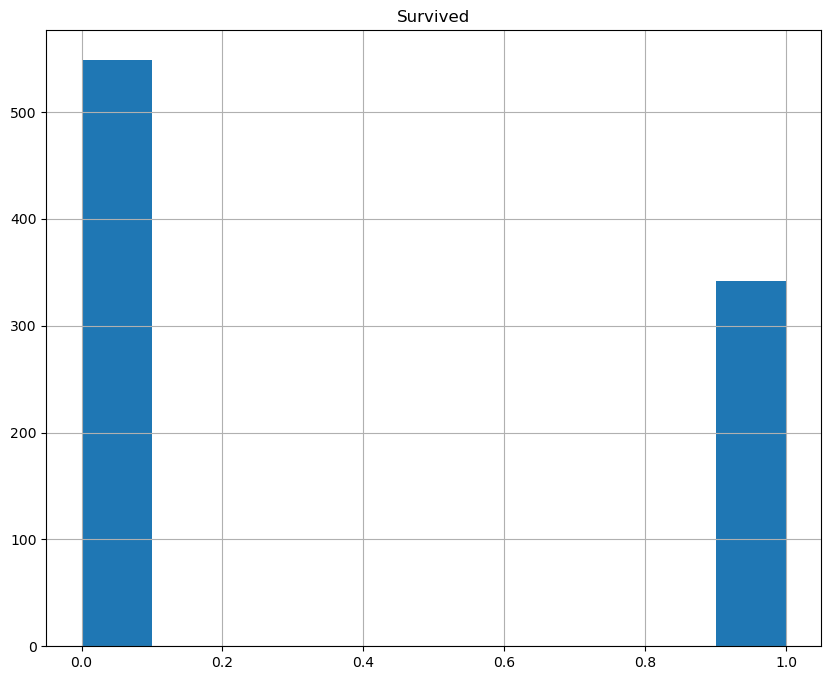

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

df_target.hist(figsize=(10, 8))

# ▣ Distribution of the Features

array([[<Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >]], dtype=object)

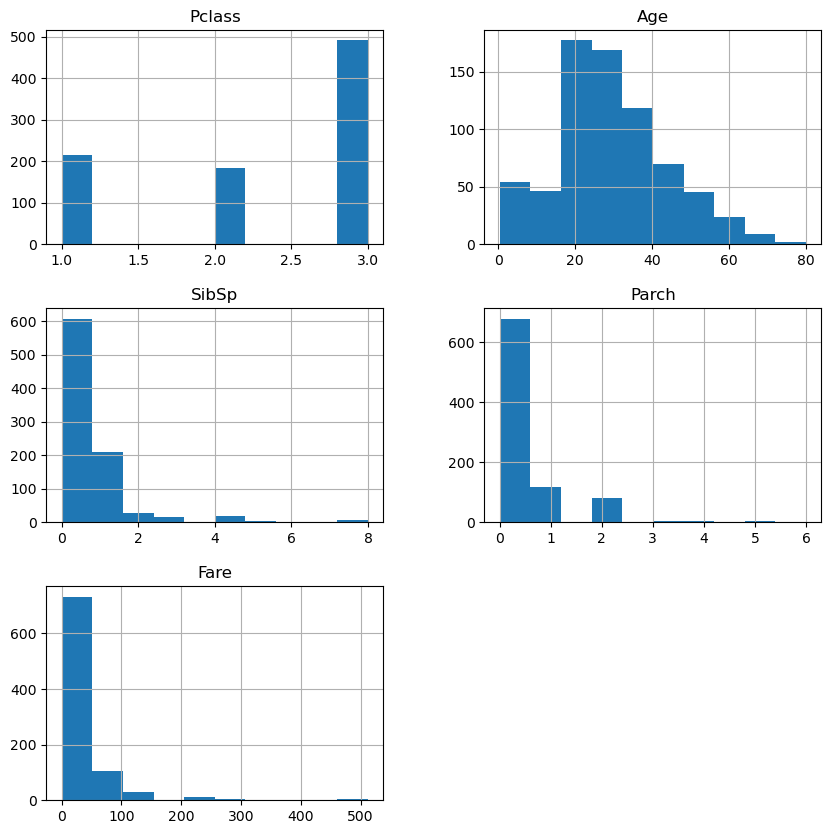

In [44]:
df_features.hist(figsize=(10, 10))

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

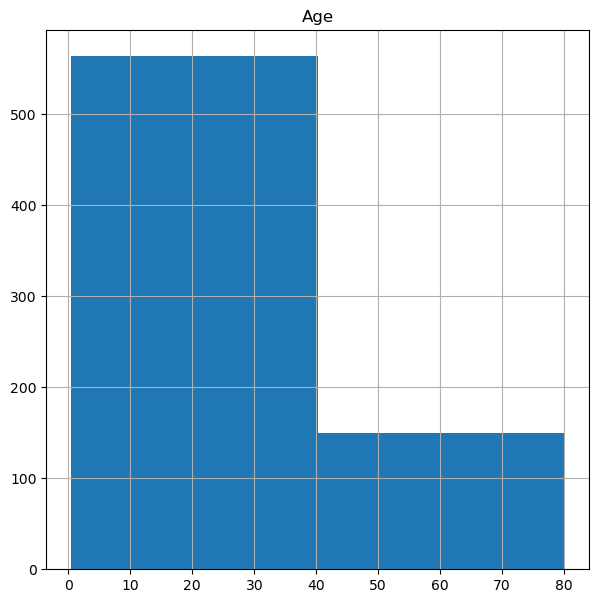

In [45]:
df_features.hist(
    column='Age',
    figsize=(7, 7),
    bins=2
)

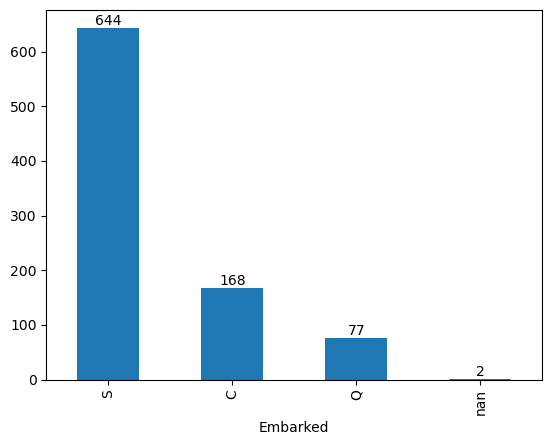

In [46]:
embarked = df_features['Embarked'].value_counts(dropna=False)
ax = embarked.plot(kind='bar')

# 막대 위에 값 표기
for container in ax.containers: # ax.containers 속성을 사용하여 그래프에 있는 모든 막대 그룹을 참조
    ax.bar_label(container)

plt.show()

<Axes: >

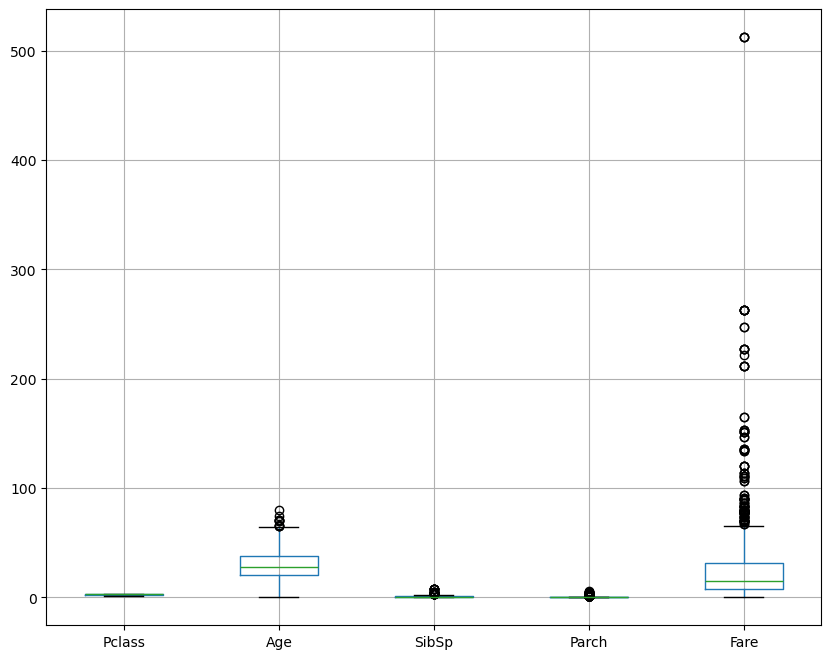

In [47]:
df_features.boxplot(figsize=(10, 8))

# ▣ Correlation Analysis

In [48]:
df_titanic_numeric = df_titanic.select_dtypes(include=['float64', 'int64'])
corr_matrix = df_titanic_numeric.corr()
print(corr_matrix)

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


In [49]:
corr_matrix['Pclass'].sort_values(ascending=False)

Pclass      1.000000
SibSp       0.083081
Parch       0.018443
Survived   -0.338481
Age        -0.369226
Fare       -0.549500
Name: Pclass, dtype: float64

# ▣ Handling Missing Values

In [50]:
# fill missing values with the median
median_age = df_features['Age'].median()
print(median_age)

df_features["Age"] = df_features["Age"].fillna(median_age)

28.0


In [51]:
# 'Embarked' 칼럼에서 가장 많이 등장한 값 찾기
most_frequent_value = df_titanic['Embarked'].mode()[0]
print(most_frequent_value)

df_features['Embarked'] = df_features['Embarked'].fillna(most_frequent_value)

S


In [52]:
df_features['CabinIsKnown'] = ~df_features['Cabin'].isnull()
df_features.drop(['Cabin'], axis=1, inplace=True)

print(df_features.columns.values)

['Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare' 'Embarked'
 'CabinIsKnown']


In [53]:
print(df_features.isnull().sum())

Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
CabinIsKnown    0
dtype: int64


# Creating New Featuers

In [54]:
df_features['FamilySize'] = df_features.SibSp + df_features.Parch

In [55]:
bins_age = [0, 20, 30, 40, 50, 150]
labels_age = [
    '<20', '20-30', '30-40', '40-50', '>50'
]

df_features['AgeCategory'] = pd.cut(
    df_features['Age'], 
    bins=bins_age,
    labels=labels_age,
    include_lowest=True,
)

In [56]:
df_features['FareCategory'] = pd.qcut(
    df_features['Fare'],
    q=4,
    labels=['Q1', 'Q2', 'Q3', 'Q4']
)

In [57]:
df_features.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinIsKnown,FamilySize,AgeCategory,FareCategory
PassengerId,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False,1,20-30,Q1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C,True,1,30-40,Q4
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,0,20-30,Q2
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,True,1,30-40,Q4
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False,0,30-40,Q2
6,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,False,0,20-30,Q2
7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,True,0,>50,Q4
8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,False,4,<20,Q3
9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,False,2,20-30,Q2


# ▣ Transforming Numeric Features

In [58]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
NormalizedAge = min_max_scaler.fit_transform(df_features[['Age']].values)
df_features['NormalizedAge'] = pd.DataFrame(NormalizedAge)

std_scaler = preprocessing.StandardScaler()
StandardizedAge = std_scaler.fit_transform(df_features[['Age']].values)
df_features['StandardizedAge'] = pd.DataFrame(StandardizedAge)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'NormalizedAge'}>],
       [<Axes: title={'center': 'StandardizedAge'}>, <Axes: >]],
      dtype=object)

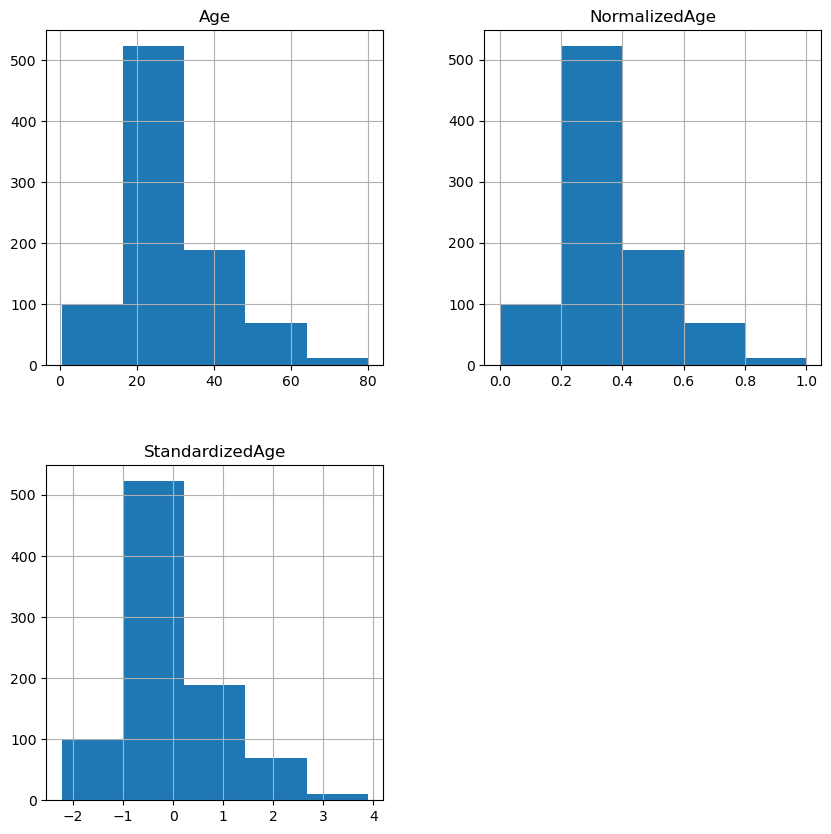

In [59]:
df_features[['Age', 'NormalizedAge', 'StandardizedAge']].hist(figsize=(10, 10), bins=5)

# ▣ One-Hot Encoding Categorical Features

In [60]:
df_features_numeric = df_features.drop(
    ['Name', 'Ticket', 'Sex', 'CabinIsKnown'], axis=1
)

In [61]:
df_temporary = pd.concat(
    [df_features_numeric, df_titanic['Survived']], axis=1
)
df_temporary.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,FamilySize,AgeCategory,FareCategory,NormalizedAge,StandardizedAge,Survived
PassengerId,,,,,,,,,,,,
1,3,22.0,1,0,7.2500,S,1,20-30,Q1,0.472229,0.663861,0
2,1,38.0,1,0,71.2833,C,1,30-40,Q4,0.321438,-0.258337,1
3,3,26.0,0,0,7.9250,S,0,20-30,Q2,0.434531,0.433312,1
4,1,35.0,1,0,53.1000,S,1,30-40,Q4,0.434531,0.433312,1
5,3,35.0,0,0,8.0500,S,0,30-40,Q2,0.346569,-0.104637,0


In [62]:
df_titanic_numeric = df_titanic.drop(columns=['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'])
correlation_matrix = df_titanic_numeric.corr()
correlation_matrix['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64